<a href="https://colab.research.google.com/github/Rohan-35/Data-science-practice/blob/main/prediction_of_covid19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [7]:
dataset = pd.read_csv('my covid project.csv')
x = dataset.iloc[:, 1].values
y = dataset.iloc[:, -1].values

In [ ]:
print(x)

[    1     1     0     0     0     2     1    22     2     1     3     5
     5     6    10    14     7     3    26     4    23    14    22    50
    92    45   108    51    87    88   140    84   106   227   146   437
   235   478   525   505   704   508   485   591   896   768   918   905
  1463  1118   826  1076   957  1324  1540  1329  1486  1229  1752  1490
  1975  1463  1594  1813  1823  1755  2411  2487  2573  3875  2680  3561
  3390  3320  3277  4213  3604  3525  3722  3967  3970  4987  5242  4970
  5611  5609  6088  6654  6767  6977  6535  6387  6566  7466  7964  8380
  8392  8171  8909  9304  9851  9887  9971  9983  9987  9985  9996 10956
 11458 11929 11502 10667 10974 12881 13586 14516 15413 14821 14933 15968
 16922 17296 18552 19906 19459 18522 18653 19148 20903 22771 24850 24248
 22252 22752 24879 26506 27114 28637 28701 28498 29429 32695 34956 34884
 38902 40425 37148 37724 45720 49310 48916 48661 49931 47703 48513 52123
 55078 57118 54735 52972 52050 52509 56282 62538 61

In [ ]:
print(y)

['2020-02-02' '2020-02-03' '2020-02-04' '2020-02-21' '2020-02-27'
 '2020-03-02' '2020-03-03' '2020-03-04' '2020-03-05' '2020-03-06'
 '2020-03-07' '2020-03-08' '2020-03-09' '2020-03-10' '2020-03-11'
 '2020-03-12' '2020-03-13' '2020-03-14' '2020-03-15' '2020-03-16'
 '2020-03-17' '2020-03-18' '2020-03-19' '2020-03-20' '2020-03-21'
 '2020-03-22' '2020-03-23' '2020-03-24' '2020-03-25' '2020-03-26'
 '2020-03-27' '2020-03-28' '2020-03-29' '2020-03-30' '2020-03-31'
 '2020-04-01' '2020-04-02' '2020-04-03' '2020-04-04' '2020-04-05'
 '2020-04-06' '2020-04-07' '2020-04-08' '2020-04-09' '2020-04-10'
 '2020-04-11' '2020-04-12' '2020-04-13' '2020-04-14' '2020-04-15'
 '2020-04-16' '2020-04-17' '2020-04-18' '2020-04-19' '2020-04-20'
 '2020-04-21' '2020-04-22' '2020-04-23' '2020-04-24' '2020-04-25'
 '2020-04-26' '2020-04-27' '2020-04-28' '2020-04-29' '2020-04-30'
 '2020-05-01' '2020-05-02' '2020-05-03' '2020-05-04' '2020-05-05'
 '2020-05-06' '2020-05-07' '2020-05-08' '2020-05-09' '2020-05-10'
 '2020-05-

# Encoding dates:

In [ ]:
testdate=pd.to_datetime(y)
print(testdate)
months=pd.to_datetime(testdate).month

DatetimeIndex(['2020-02-02', '2020-02-03', '2020-02-04', '2020-02-21',
               '2020-02-27', '2020-03-02', '2020-03-03', '2020-03-04',
               '2020-03-05', '2020-03-06',
               ...
               '2020-11-12', '2020-11-13', '2020-11-14', '2020-11-15',
               '2020-11-16', '2020-11-17', '2020-11-18', '2020-11-19',
               '2020-11-20', '2020-11-21'],
              dtype='datetime64[ns]', length=270, freq=None)


# Training model using Polynomial Regression

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
x=x.reshape(-1,1)
#testdate=testdate.reshape(-1,1)
lin_reg.fit(x, months)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures  #for matrix of feature creation
poly_reg = PolynomialFeatures(degree = 4) 
X_poly = poly_reg.fit_transform(x)  #applies this to x and transforms it to according to prexisting matrix of x
lin_reg_2 = LinearRegression()  
lin_reg_2.fit(X_poly, months)  #creates a multiple regression of all individual polynomial matrices

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Prediction of results

In [ ]:
results=lin_reg_2.predict(poly_reg.fit_transform([[0]]))
results=float(results[0])
print(f"Covid new cases would be 0 till {round(results,2)}th month of 2021")

Covid new cases would be 0 till 4.11th month of 2021


# Plotting the results

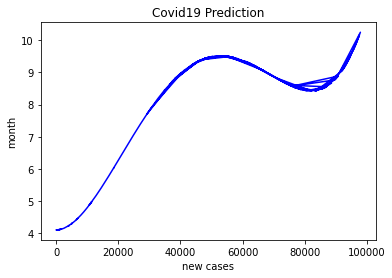

In [ ]:
plt.plot(x, lin_reg_2.predict(X_poly), color = 'blue') 
plt.title('Covid19 Prediction')
plt.xlabel('new cases')
plt.ylabel('month')
plt.show()